In [4]:
import torch
import numpy as np
import os
from tqdm import tqdm

def nan_to_num(x, replacement = 0):
    nan_mask = torch.isnan(x)
    x[nan_mask] = replacement
    


In [9]:
test = torch.tensor([5, 6, 7, float('nan')])
print(test)
nan_to_num(test)
print(test)

tensor([5., 6., 7., nan])
tensor([5., 6., 7., 0.])


In [9]:
root_dir = '/nobackup/users/jrajagop/vids'
import time
import os
start = time.time()
files = os.listdir(root_dir)
for direc in files[:20]:
    if direc[0] != '.':
        prosody = np.load(f'{root_dir}/{direc}/{direc}_frames.npy')
print(time.time() - start)


0.05489659309387207


In [6]:
root_dir = '/nobackup/users/jrajagop/vids'
for direc in tqdm(os.listdir(root_dir)):
    if direc[0] != '.':
        f0, voiced, amp = np.load(f'{root_dir}/{direc}/{direc}_pros.npy')[0,:], np.load(f'{root_dir}/{direc}/{direc}_pros.npy')[1,:], np.load(f'{root_dir}/{direc}/{direc}_pros.npy')[2,:]
        voiced_0_locs = np.where(voiced == 0)
        f0_nan_locs = np.where(np.isnan(f0) == True)
        a = list(voiced_0_locs[0])
        b = list(f0_nan_locs[0])
        if len(a) != len(b):
            print(direc)
        for i in range(len(a)):
            if a[i] != b[i]:
                print(direc)
            

100%|██████████| 19697/19697 [00:28<00:00, 698.35it/s]


In [11]:
np.load('mercuryNet/data/all_windows.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'mercuryNet/data/all_windows.npy'

In [3]:
import numpy as np
data = np.load('../model/results/loss_07_19-54.npy')
print(data.shape)
import matplotlib.pyplot as plt

print(data[, :, :])

(732, 3, 5)
[[9.28507298e-02 3.27540077e-02 2.88760266e-01 3.80656141e-01
  7.21325696e-01]
 [2.10340247e-01 1.16885252e-01 4.34473488e-01 4.35113171e-01
  4.77636665e-01]
 [3.04093361e+01 1.98084669e+01 6.69226967e+01 7.95851219e+01
  3.67417603e+02]]


In [37]:
import numpy as np
data = np.load('targ.npy')
data2 = np.load('model_out.npy')
print(data[50], data2[50])

[175.11872864 164.33805847 160.58457947 158.7401123  156.91682434
 157.82583618 158.7401123  159.65968323 165.29006958 166.24757385
 165.29006958 160.58457947 156.91682434          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 162.45048523 160.58457947 157.82583618
 132.71517944 128.19441223 127.45606232 125.99210358          nan
          nan          nan          nan          nan 142.24060059
 135.0349884  132.71517944 126.7219696  122.40535736 120.30250549
 119.60961151 118.23577881 117.55479431 111.59971619 107.17734528
          nan          nan          nan          nan          nan
          nan          nan 225.7928772  224.49241638 208.25242615
 210.67221069 210.67221069 188.77485657 181.29426575          nan
          nan 506.88787842 512.77764893 492.45776367 478.43844604
 470.21917725 470.21917725 472.94311523 483.99765015 486.8013916
 486.801391

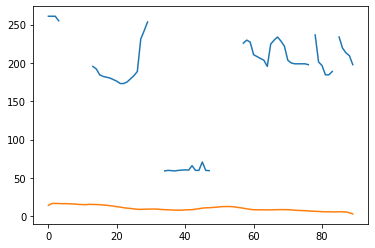

In [38]:
import matplotlib.pyplot as plt
plt.plot(data[20])
plt.plot(data2[20])